# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [364]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [365]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [366]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [367]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [368]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [369]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [370]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [371]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [372]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [373]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_features = df.select_dtypes(include='float64').columns.tolist()


scaler = MinMaxScaler()
if numerical_features :
  df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [374]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
col_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate']
df.drop(columns=[col for col in col_drop if col in df.columns], inplace=True)
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [375]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
cat_features = df.select_dtypes(include='object').columns.tolist()

for col in cat_features:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])



In [376]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [377]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
for col in numerical_features:
  if col in df.columns and df[col].isnull().any():
    df[col].fillna(df[col].median(), inplace=True)


for col in cat_features:
  if col in df.columns and df[col].isnull().any():
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-377-65f55ed9c30d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [378]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [379]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [380]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [381]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,0.154526,0.789121,21.319275,1.009460,0.430334,1.530942,0.377058,0.030154,0.336643
std,0.151580,0.436044,12.394402,0.830646,0.286677,1.149307,0.240422,0.148026,0.260633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043156,1.000000,11.000000,0.000000,0.145161,1.000000,0.182759,0.000000,0.095323
50%,0.110014,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.311416
75%,0.213331,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.505876
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000


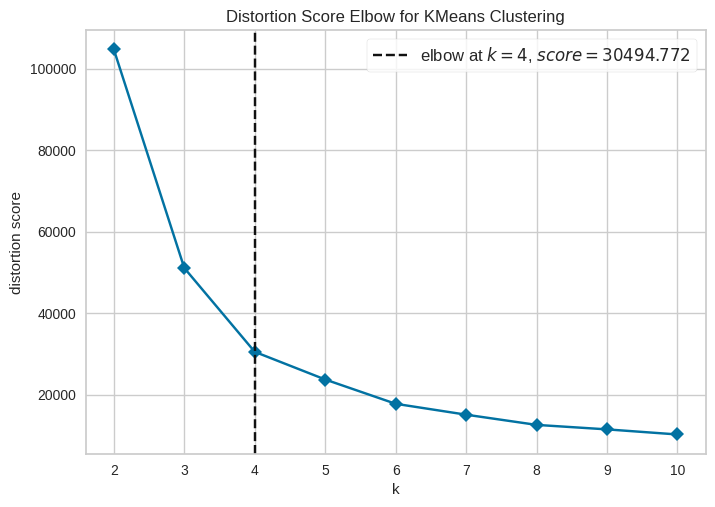

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [382]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X_cluster = df.copy()

model_kmeans_for_elbow = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model_kmeans_for_elbow, k=(2,11), metric='distortion', timings=False)

visualizer.fit(X_cluster)
visualizer.show()

In [383]:
# Menggunakan algoritma K-Means Clustering
best_k = visualizer.elbow_value_ if visualizer.elbow_value_ is not None else 4


model_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
df['Target'] = model_kmeans.fit_predict(X_cluster)

Jalankan cell code ini untuk menyimpan model kamu.

In [396]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [385]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [386]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [387]:
# Membangun model menggunakan PCA.

In [388]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [398]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

features_for_interpretation = [col for col in df.columns if col != 'Target']

hasil_cluster = df.groupby('Target')[features_for_interpretation].agg(['mean', 'min', 'max'])
hasil_cluster


TransactionAmount                      ... AccountBalance                    
                    mean       min       max  ...           mean       min       max
Target                                        ...                                   
0               0.154519  0.000099  0.840144  ...       0.337931  0.001125  0.997633
1               0.156512  0.000599  0.953561  ...       0.338186  0.000000  1.000000
2               0.154382  0.000000  1.000000  ...       0.329700  0.000774  0.988352
3               0.152566  0.000031  0.954092  ...       0.342198  0.001885  0.997144

[4 rows x 27 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1.  **Cluster 1 (Target 0): (Pelanggan dari Lokasi Kelompok A dengan Karakteristik Transaksi Serupa)**:
    * **Rata-rata (mean) TransactionAmount (scaled):** 0.1545
    * **Rata-rata (mean) TransactionType (encoded):** 0.797
    * **Rata-rata (mean) Location (encoded):** 15.02
    * **Rata-rata (mean) Channel (encoded):** 0.998
    * **Rata-rata (mean) CustomerAge (scaled):** 0.4315
    * **Rata-rata (mean) CustomerOccupation (encoded):** 1.439
    * **Rata-rata (mean) TransactionDuration (scaled):** 0.389
    * **Rata-rata (mean) LoginAttempts (scaled):** 0.037
    * **Rata-rata (mean) AccountBalance (scaled):** 0.338
    * **Analisis:** Cluster ini terdiri dari pelanggan yang cenderung melakukan transaksi dengan jumlah relatif rendah melalui channel yang dominan (nilai encode ~0.998). Mereka berasal dari kelompok lokasi dengan nilai encode rata-rata 15.02, memiliki usia menengah (scaled ~0.43), dan upaya login yang sangat rendah. Karakteristik jenis transaksi, pekerjaan, durasi transaksi, dan saldo akunnya menunjukkan pola tertentu berdasarkan nilai encode/scaled rata-rata yang ada.

2.  **Cluster 2 (Target 1): (Pelanggan dari Lokasi Kelompok B dengan Upaya Login Terendah)**:
    * **Rata-rata (mean) TransactionAmount (scaled):** 0.1565
    * **Rata-rata (mean) TransactionType (encoded):** 0.769
    * **Rata-rata (mean) Location (encoded):** 37.72
    * **Rata-rata (mean) Channel (encoded):** 1.036
    * **Rata-rata (mean) CustomerAge (scaled):** 0.409
    * **Rata-rata (mean) CustomerOccupation (encoded):** 1.478
    * **Rata-rata (mean) TransactionDuration (scaled):** 0.366
    * **Rata-rata (mean) LoginAttempts (scaled):** 0.022
    * **Rata-rata (mean) AccountBalance (scaled):** 0.338
    * **Analisis:** Pelanggan di cluster ini memiliki karakteristik transaksi (jumlah, jenis, channel, durasi, saldo) yang sangat mirip dengan Cluster 1. Pembeda utama adalah mereka berasal dari kelompok lokasi dengan nilai encode rata-rata yang lebih tinggi (37.72) dan memiliki tingkat upaya login yang paling rendah di antara semua cluster. Usia rata-rata (scaled ~0.409) sedikit lebih muda.

3.  **Cluster 3 (Target 2): (Pelanggan dari Lokasi Kelompok C dengan Karakteristik Serupa Lainnya)**:
    * **Rata-rata (mean) TransactionAmount (scaled):** 0.1544
    * **Rata-rata (mean) TransactionType (encoded):** 0.785
    * **Rata-rata (mean) Location (encoded):** 26.46
    * **Rata-rata (mean) Channel (encoded):** 0.980
    * **Rata-rata (mean) CustomerAge (scaled):** 0.437
    * **Rata-rata (mean) CustomerOccupation (encoded):** 1.617
    * **Rata-rata (mean) TransactionDuration (scaled):** 0.375
    * **Rata-rata (mean) LoginAttempts (scaled):** 0.030
    * **Rata-rata (mean) AccountBalance (scaled):** 0.330
    * **Analisis:** Pelanggan dalam cluster ini juga menunjukkan pola transaksi yang mirip dengan dua cluster sebelumnya. Pembeda utamanya adalah kelompok lokasi mereka dengan nilai encode rata-rata 26.46. Rata-rata encode pekerjaan sedikit lebih tinggi (1.617) dan saldo akun rata-rata (scaled ~0.330) sedikit lebih rendah.

4.  **Cluster 4 (Target 3): (Pelanggan dari Lokasi Kelompok D dengan Usia dan Saldo Akun Sedikit Lebih Tinggi)**:
    * **Rata-rata (mean) TransactionAmount (scaled):** 0.1526
    * **Rata-rata (mean) TransactionType (encoded):** 0.807
    * **Rata-rata (mean) Location (encoded):** 4.56
    * **Rata-rata (mean) Channel (encoded):** 1.030
    * **Rata-rata (mean) CustomerAge (scaled):** 0.443
    * **Rata-rata (mean) CustomerOccupation (encoded):** 1.587
    * **Rata-rata (mean) TransactionDuration (scaled):** 0.376
    * **Rata-rata (mean) LoginAttempts (scaled):** 0.030
    * **Rata-rata (mean) AccountBalance (scaled):** 0.342
    * **Analisis:** Cluster ini dibedakan oleh asal pelanggan dari kelompok lokasi dengan nilai encode rata-rata terendah (4.56). Meskipun jumlah transaksi rata-rata (scaled ~0.1526) sedikit lebih rendah, mereka cenderung memiliki usia rata-rata (scaled ~0.443) dan saldo akun rata-rata (scaled ~0.342) yang sedikit lebih tinggi dibandingkan cluster lainnya, dengan tetap mempertahankan upaya login yang rendah dan penggunaan channel yang serupa.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [400]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
print(df.head())
if 'Target' in df.columns:
    print("\nKolom 'Target' sudah ada.")
else:
    print("\nKolom 'Target' BELUM ada. Periksa langkah pembuatan model K-Means.")

   TransactionAmount  TransactionType  ...  AccountBalance  Target
0           0.007207                1  ...        0.336832       1
1           0.195940                1  ...        0.918055       0
2           0.065680                1  ...        0.068637       2
3           0.096016                1  ...        0.569198       1
4           0.006874                0  ...        0.492591       3

[5 rows x 10 columns]

Kolom 'Target' sudah ada.


In [401]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [392]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [393]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [394]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [395]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)